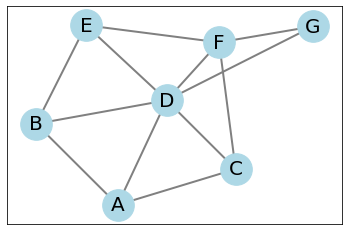

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new graph object
G = nx.Graph()

# add nodes to the graph
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")
G.add_node("G")

# add edges to the graph
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("A", "D")
G.add_edge("B", "D")
G.add_edge("B", "E")
G.add_edge("C", "D")
G.add_edge("C", "F")
G.add_edge("D", "E")
G.add_edge("D", "F")
G.add_edge("D", "G")
G.add_edge("E", "F")
G.add_edge("F", "G")

# set the positions of the nodes
pos = nx.spring_layout(G)

# draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=2)

# draw the labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# show the graph
# plt.axis("off")
plt.show()


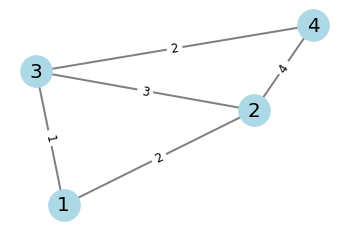

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new graph object
G = nx.Graph()

# add nodes to the graph with features
G.add_node("A", feature1=1, feature2=3)
G.add_node("B", feature1=2, feature2=5)
G.add_node("C", feature1=3, feature2=1)
G.add_node("D", feature1=4, feature2=2)

# add edges to the graph
G.add_edge("A", "B", weight=2)
G.add_edge("A", "C", weight=1)
G.add_edge("B", "C", weight=3)
G.add_edge("B", "D", weight=4)
G.add_edge("C", "D", weight=2)

# set the positions of the nodes
pos = nx.spring_layout(G)

# draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=2)

# draw the labels for the nodes
node_labels = nx.get_node_attributes(G, "feature1")
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=20, font_family="sans-serif")
# add labels to the edges
edge_labels = {(u, v): w["weight"] for u, v, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
# show the graph
plt.axis("off")
plt.show()


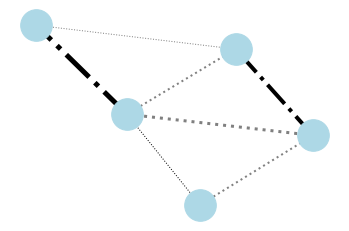

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new graph object
G = nx.Graph()

# add nodes to the graph
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

# add edges to the graph with multiple weights
G.add_edge("A", "B", weight1=2, weight2=0.5)
G.add_edge("A", "C", weight1=1, weight2=0.2)
G.add_edge("B", "C", weight1=3, weight2=0.8)
G.add_edge("B", "D", weight1=4, weight2=1.0)
G.add_edge("C", "D", weight1=2, weight2=0.5)
G.add_edge("C", "E", weight1=5, weight2=1.2)
G.add_edge("D", "E", weight1=1, weight2=0.3)

# set the positions of the nodes
pos = nx.spring_layout(G)

# draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color=["gray", "black"], width=[w["weight1"] for u, v, w in G.edges(data=True)], style=[":" if w["weight2"]<1 else "-." for u, v, w in G.edges(data=True)])

# show the graph
plt.axis("off")
plt.show()


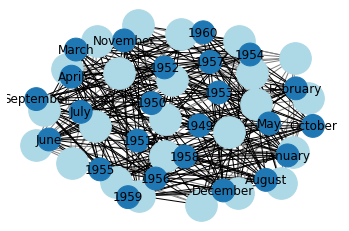

In [36]:
import pandas as pd
import networkx as nx

# read the CSV file into a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")

# create a new networkx graph object
G = nx.Graph()

# add nodes to the graph
for i, row in df.iterrows():
  # G.add_node(row["year"], airline=row["airline"])
  G.add_node(row["year"])

# add edges to the graph
for i, row in df.iterrows():
    G.add_edge(row["year"], row["month"], passengers=row["passengers"])

# calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# # print the centrality data to the console
# for node in G.nodes():
#     print(f"Node: {node}")
#     print(f"Degree Centrality: {degree_centrality[node]}")
#     print(f"Betweenness Centrality: {betweenness_centrality[node]}")
#     print(f"Closeness Centrality: {closeness_centrality[node]}")
#     print()

# write the centrality data to a new CSV file
centrality_df = pd.DataFrame({
    "node": list(G.nodes()),
    "degree_centrality": list(degree_centrality.values()),
    "betweenness_centrality": list(betweenness_centrality.values()),
    "closeness_centrality": list(closeness_centrality.values())
})
centrality_df.to_csv("centrality.csv", index=False)

# set the positions of the nodes
pos = nx.spring_layout(G)

# draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color=["gray", "black"])
# Set node size based on centrality values
node_size = [v * 1000 for v in degree_centrality.values()]

# Draw the network with node size based on centrality values
nx.draw(G, node_size=node_size, with_labels=True)

# show the graph
plt.axis("off")
plt.show()


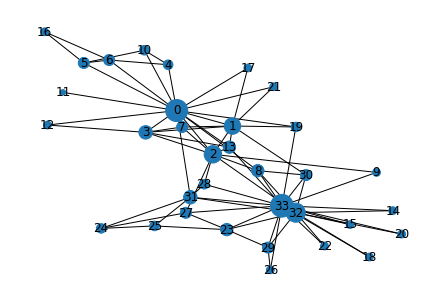

In [31]:
# example with node importance 
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.karate_club_graph()

# Calculate centrality values
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Set node size based on centrality values
node_size = [v * 1000 for v in degree_centrality.values()]

# Draw the network with node size based on centrality values
nx.draw(G, node_size=node_size, cmap=plt.cm.Blues, with_labels=True)
plt.show()
